In [2]:
!gdown --id 1FxdYTtHxLUER4ZHWZQ6aSB_ds7D26PRD

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FxdYTtHxLUER4ZHWZQ6aSB_ds7D26PRD
To: /content/юридический_помощник.zip
100% 6.37M/6.37M [00:00<00:00, 136MB/s]


In [3]:
!unzip /content/юридический_помощник.zip

Archive:  /content/юридический_помощник.zip
   creating: Документы/
  inflating: Документы/208_ot_18_fevralya_2022.docx  
  inflating: Документы/221_ot_19_02_2022.docx  
  inflating: Документы/33__33__33__33_o_vnesen_izm_33__33_Postanovlenie_Pravitelstva_RF_ot_28_10_2021_N_1850.docx  
  inflating: Документы/392_ot_17_marta_2022.docx  
  inflating: Документы/453_ot_24_marta_2022.docx  
  inflating: Документы/469_ot_25_marta_2022.docx  
  inflating: Документы/574_ot_2_aprelya_2022.docx  
  inflating: Документы/662_ot_14_04_2022.docx  
  inflating: Документы/662_ot_14_aprelya_2022.docx  
  inflating: Документы/664_ot_14_04_2022.docx  
  inflating: Документы/664_ot_14_aprelya_2022.docx  
  inflating: Документы/761_ot_27_04_2022.docx  
  inflating: Документы/761_ot_27_aprelya_2022.docx  
  inflating: Документы/772_ot_28_aprelya_2022.docx  
  inflating: Документы/804_ot_30_aprelya_2022.docx  
  inflating: Документы/811_ot_4_maya_2022.docx  
  inflating: Документы/814_ot_5_maya_2022.docx  
  

In [5]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 10.0 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=1a16c40efb8b34732d20679d25be8ab31fafbddfdfe3c099dd2c25a9b946b541
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [28]:
from docx import Document
document = Document('docs/208_ot_18_fevralya_2022.docx')
print(document.paragraphs)

[<docx.text.paragraph.Paragraph object at 0x7f6f190ea050>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea0d0>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea150>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea190>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea210>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea2d0>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea310>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea390>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea090>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea250>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea410>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea450>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea4d0>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea510>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea590>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea5d0>, <docx.text.paragraph.Paragraph object at 0x7f6f190ea650>, <docx.text.pa

In [ ]:

for p in document.paragraphs:
  if p.text.find('{')>-1:
    l=(re.findall('{(.+?)}',p.text))
    res = re.findall(r'\{.*?\}.*?\{.*?\}', p.text)
    for i in res:
      print(i)
    # df.loc[len(df.index)] = [p.text[start+1:end], int(l[0])]
    # print(p.text,)


In [46]:
import pandas as pd

df = pd.DataFrame({'content': [],
                   'tag': []
})

In [62]:
df

,content,tag
0,"Настоящие Правила устанавливают цели, условия...",2.0
1,Грант в форме субсидии предоставляется молоде...,5.0
2,Грант в форме субсидии предоставляется Минист...,3.0
3,Размер гранта в форме субсидии определяется и...,22.0
4,утвержденных федеральным органом исполнительн...,22.0
...,...,...
18610,"C - объем полученной в отчетном году субсидии,...",38.0
18611,Министерство промышленности и торговли Российс...,37.0
18612,"В случае установления по итогам проверок, пров...",38.0
18613,на основании требования Министерства промышлен...,38.0


In [61]:
for i in range(18615):
  string = re.sub(r'{(.+?)}', '', df.content[i])
  df.content[i]=string


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
import glob

k=0
files=[]
for filepath in glob.iglob('docs/*.docx'):
    k+=1
    files.append(filepath)
files


In [51]:
import re
for i in files:
  document = Document(i)
  for p in document.paragraphs:
    try:
        l=0
        res = re.findall(r'\{.*?\}.*?\{.*?\}', p.text)
        for i in res:
          l=(re.findall('{(.+?)}',i))
          df.loc[len(df.index)] = [i, int(l[0])]
    except:
      print(p.text)


б){15} проверяет в течение 7 рабочих дней со дня поступления документов {15},  {}15указанных в  настоящих Правил, полноту содержащихся в них сведений и направляет их на рассмотрение Комиссии. {15}


In [74]:
df.to_csv('dataset.csv')

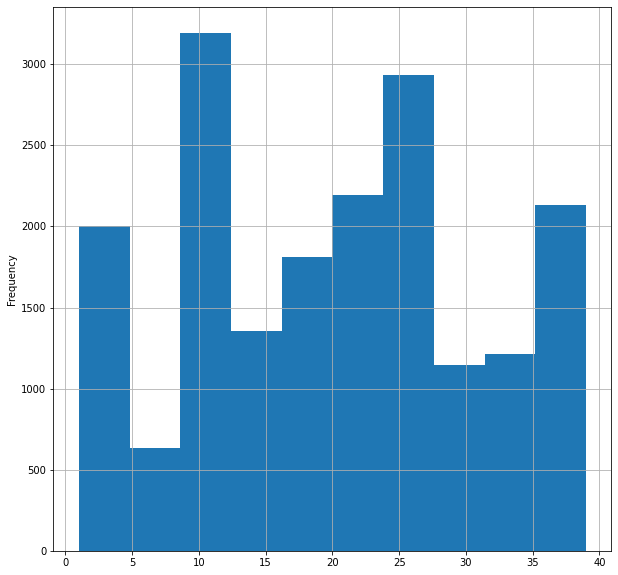

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
df['tag'].plot(kind='hist',figsize=(10,10),ax=ax)
ax.grid()
